C:\Users\ansankar\AppData\Local\Temp\ipykernel_22088\1378291602.py:8: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='utf-8')
C:\Users\ansankar\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ansankar\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ansankar\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

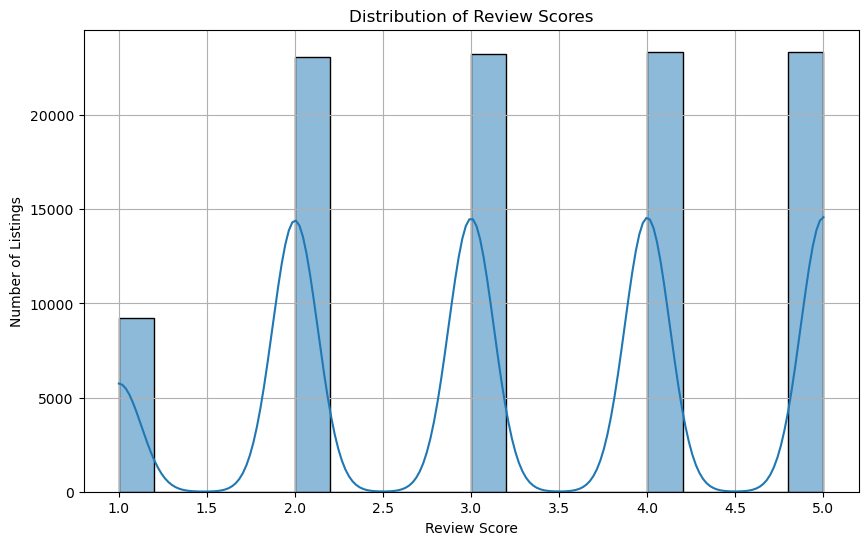

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the data
file_path = r"C:\Users\ansankar\Documents\Airbnb_Open_Data (2).csv"
df = pd.read_csv(file_path, encoding='utf-8')

# Convert price to numeric after removing the dollar sign and commas
df['price'] = df['price'].replace({'\\$': '', ',': ''}, regex=True).astype(float)



# Visualization 1: Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution of Airbnb Listings')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('price_distribution.png')
plt.close()

# Visualization 2: Number of Listings by Neighbourhood Group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='neighbourhood group', order=df['neighbourhood group'].value_counts().index)
plt.title('Number of Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('listings_by_neighbourhood_group.png')
plt.close()

# Visualization 3: Average Price by Room Type
df_avg_price_by_room_type = df.groupby('room type')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=df_avg_price_by_room_type, x='room type', y='price', order=df_avg_price_by_room_type.sort_values('price', ascending=False)['room type'])
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.savefig('price_by_room_type.png')
plt.close()

# Visualization 4: Availability Throughout the Year
df['last review'] = pd.to_datetime(df['last review'])
df['month'] = df['last review'].dt.month
avg_availability = df.groupby('month')['availability 365'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_availability, x='month', y='availability 365')
plt.title('Average Availability Throughout the Year')
plt.xlabel('Month')
plt.ylabel('Average Availability (days)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.savefig('availability_throughout_year.png')
plt.close()

# Visualization 5: Review Scores Distribution (Updated)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='review rate number', bins=20, kde=True)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Number of Listings')
plt.grid(True)
plt.show()

# Visualization 6: Top 10 Hosts by Number of Listings
top_hosts = df['host name'].value_counts().nlargest(10).reset_index()
top_hosts.columns = ['Host Name', 'Number of Listings']
plt.figure(figsize=(12, 6))
sns.barplot(data=top_hosts, x='Host Name', y='Number of Listings')
plt.title('Top 10 Hosts by Number of Listings')
plt.xlabel('Host Name')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.savefig('top_hosts.png')
plt.close()

# Create a CSV file listing the images
image_data = {
    'Image Filename': [
        'price_distribution.png',
        'listings_by_neighbourhood_group.png',
        'price_by_room_type.png',
        'availability_throughout_year.png',
        'review_scores_distribution.png',
        'top_hosts.png'
    ],
    'Description': [
        'Price Distribution of Airbnb Listings',
        'Number of Listings by Neighbourhood Group',
        'Average Price by Room Type',
        'Average Availability Throughout the Year',
        'Distribution of Review Scores',
        'Top 10 Hosts by Number of Listings'
    ]
}

#image_df = pd.DataFrame(image_data)
#image_df.to_csv('visualizations_list.csv', index=False)

#print("Visualizations saved as images and listed in visualizations_list.csv.")
